In [1]:
# Importing packages
import numpy as np  # for matrix and data manipulation
import pandas as pd  # for DataFrames
import matplotlib.pyplot as plt  # for plotting
import seaborn as sns  # for more plotitng
import statsmodels.api as sm  # for statistical modelling
import scikitplot as skplt  # for scikit-learn plotting

from sklearn.preprocessing import StandardScaler  # for preprocessing & scaling
from sklearn.preprocessing import PolynomialFeatures  # for polynomial features preprocessing
from sklearn.impute import SimpleImputer   # for missing values imputation
from sklearn.model_selection import train_test_split  # train-test splits
from sklearn.model_selection import StratifiedKFold  # K-fold resampling, stratified
from sklearn.model_selection import GridSearchCV  # Hyperparameter tuning
from sklearn.calibration import CalibratedClassifierCV  # Hyperparameter tuning with calibration
from sklearn.calibration import calibration_curve  # calibration curve plotting
from sklearn.calibration import CalibrationDisplay  # calibration curve plotting
from sklearn.metrics import confusion_matrix  # performance metrics, confusion matrix
from sklearn.metrics import classification_report  # performance matrix classifiaction report
from sklearn.metrics import roc_auc_score  # Area Under Receiver Operating Characteristics
from sklearn.metrics import roc_curve  # ROC
from sklearn.metrics import RocCurveDisplay  # ROC plotting
from sklearn.metrics import accuracy_score  # performance metric accuracy (0/1) score
from sklearn.metrics import precision_score  # performance metric
from sklearn.linear_model import LogisticRegression  # Logistic regression modelling
from sklearn.neighbors import KNeighborsClassifier  # KNN
from sklearn.ensemble import RandomForestClassifier  # Random Forest for classification
from sklearn.ensemble import GradientBoostingClassifier  # GBM for classification
from sklearn.svm import SVC  # SVM for classification
from sklearn.utils import resample  # Resampling
from imblearn.over_sampling import SMOTE  # Synthetic upsampling

In [2]:
# Setting plotting style
plt.style.use('seaborn-v0_8-darkgrid')

In [3]:
# Jupyter magic command to show plots inline immediately
%matplotlib inline

In [4]:
# Setting seed
seed = 43
np.random.seed(seed)

In [5]:
# Loading the house price dataset
data_file_path = './'  # Set to the path of folder where you can find 'train_V2.csv' and 'score.csv'

# Training data
train_V2 = pd.read_csv(data_file_path + 'train_V2.csv')
score = pd.read_csv(data_file_path + 'score.csv')
print('Training set shape: {}' .format(train_V2.shape))
print('Score set shape: {}' .format(score.shape))

#dictionary = pd.read_csv(data_file_path + 'dictionary.csv')
#print('Dictionary set shape: {}' .format(score.shape))

Training set shape: (5000, 53)
Score set shape: (500, 50)


In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(train_V2.columns.tolist())
for col in train_V2.columns.tolist():
    print(col)

['income_am', 'profit_last_am', 'profit_am', 'damage_am', 'damage_inc', 'crd_lim_rec', 'credit_use_ic', 'gluten_ic', 'lactose_ic', 'insurance_ic', 'spa_ic', 'empl_ic', 'cab_requests', 'married_cd', 'bar_no', 'sport_ic', 'neighbor_income', 'age', 'marketing_permit', 'urban_ic', 'dining_ic', 'presidential', 'client_segment', 'sect_empl', 'prev_stay', 'prev_all_in_stay', 'divorce', 'fam_adult_size', 'children_no', 'tenure_mts', 'tenure_yrs', 'company_ic', 'claims_no', 'claims_am', 'nights_booked', 'gender', 'shop_am', 'shop_use', 'retired', 'gold_status', 'score1_pos', 'score1_neg', 'score2_pos', 'score2_neg', 'score3_pos', 'score3_neg', 'score4_pos', 'score4_neg', 'score5_pos', 'score5_neg', 'outcome_profit', 'outcome_damage_inc', 'outcome_damage_amount']
income_am
profit_last_am
profit_am
damage_am
damage_inc
crd_lim_rec
credit_use_ic
gluten_ic
lactose_ic
insurance_ic
spa_ic
empl_ic
cab_requests
married_cd
bar_no
sport_ic
neighbor_income
age
marketing_permit
urban_ic
dining_ic
president

In [8]:
# Setting 'Id' columns as index
train_V2.insert(0, 'Id', range(0, 0 + len(train_V2)))
if 'Id' in train_V2.columns:
    train_V2 = train_V2.set_index('Id')

In [9]:
train_V2.head()

,income_am,profit_last_am,profit_am,damage_am,damage_inc,crd_lim_rec,credit_use_ic,gluten_ic,lactose_ic,insurance_ic,spa_ic,empl_ic,cab_requests,married_cd,bar_no,sport_ic,neighbor_income,age,marketing_permit,urban_ic,dining_ic,presidential,client_segment,sect_empl,prev_stay,prev_all_in_stay,divorce,fam_adult_size,children_no,tenure_mts,tenure_yrs,company_ic,claims_no,claims_am,nights_booked,gender,shop_am,shop_use,retired,gold_status,score1_pos,score1_neg,score2_pos,score2_neg,score3_pos,score3_neg,score4_pos,score4_neg,score5_pos,score5_neg,outcome_profit,outcome_damage_inc,outcome_damage_amount
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,227.0,0.0,3201.0,888.0,6.0,15000.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,True,2.0,1.0,28936.0,37.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,3.0,2.0,476.0,40.0,0.0,0.0,0.0,209.0,M,0.000000,0.0,0.0,0.0,0.467768,0.98334,NaN,NaN,NaN,NaN,0.838147,0.082288,NaN,NaN,1791.66,0,0.00
1,268.0,16.0,1682.0,0.0,0.0,750.0,0.0,0.0,0.0,1.0,1.0,0.0,7.0,True,3.0,0.0,16674.0,18.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,27.0,2.0,0.0,0.0,0.0,4.0,M,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.955259,1672.78,1,829.66
2,283.0,23.0,1673.0,0.0,0.0,750.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,True,4.0,0.0,32552.0,21.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,95.0,8.0,0.0,0.0,0.0,6.0,M,0.000000,0.0,0.0,0.0,NaN,NaN,0.232375,0.099529,NaN,NaN,NaN,NaN,0.101955,1.743020,1001.40,0,0.00
3,227.0,0.0,1685.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,True,8.0,1.0,32252.0,37.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,2.0,NaN,NaN,0.0,0.0,0.0,4.0,V,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.889793,NaN,NaN,NaN,NaN,1785.59,0,0.00
4,4091.0,1028.0,3425.0,785.0,2.0,14000.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,False,2.0,1.0,29605.0,26.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,2.0,0.0,354.0,30.0,0.0,0.0,0.0,3.0,V,1454.210627,1.0,0.0,0.0,NaN,NaN,NaN,NaN,0.330503,0.766294,0.490486,0.542445,NaN,NaN,3140.74,0,0.00


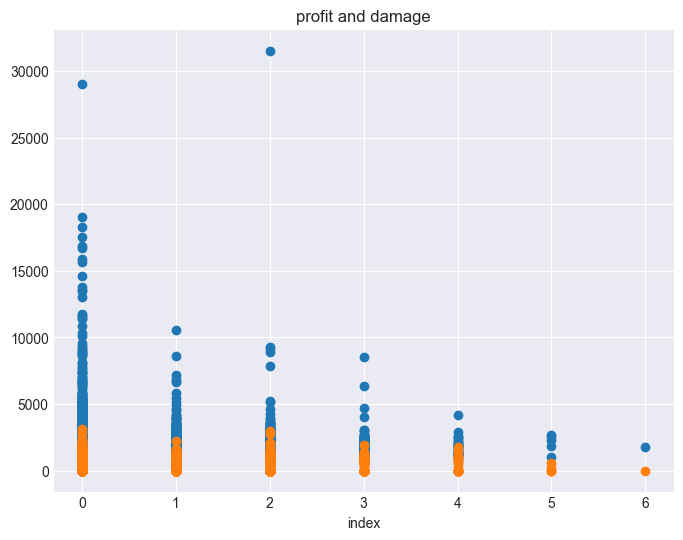

In [10]:
# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(x=train_V2['children_no'], y=train_V2['outcome_profit']);
plt.scatter(x=train_V2['children_no'], y=train_V2['outcome_damage_amount']);
plt.title('profit and damage');
plt.xlabel('index');

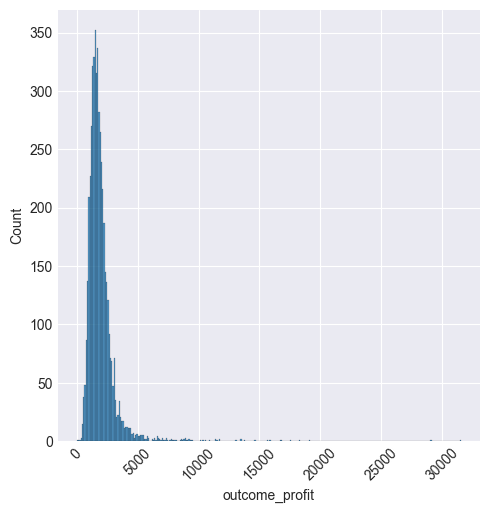

In [7]:
# Checking univariate distribution of the sales price
sns.displot(train_V2['outcome_profit']);  # With seaborn for a change
plt.xticks(rotation=45); # Rotating x labels

# plt alternative
#plt.hist(train_V2['outcome_profit']);

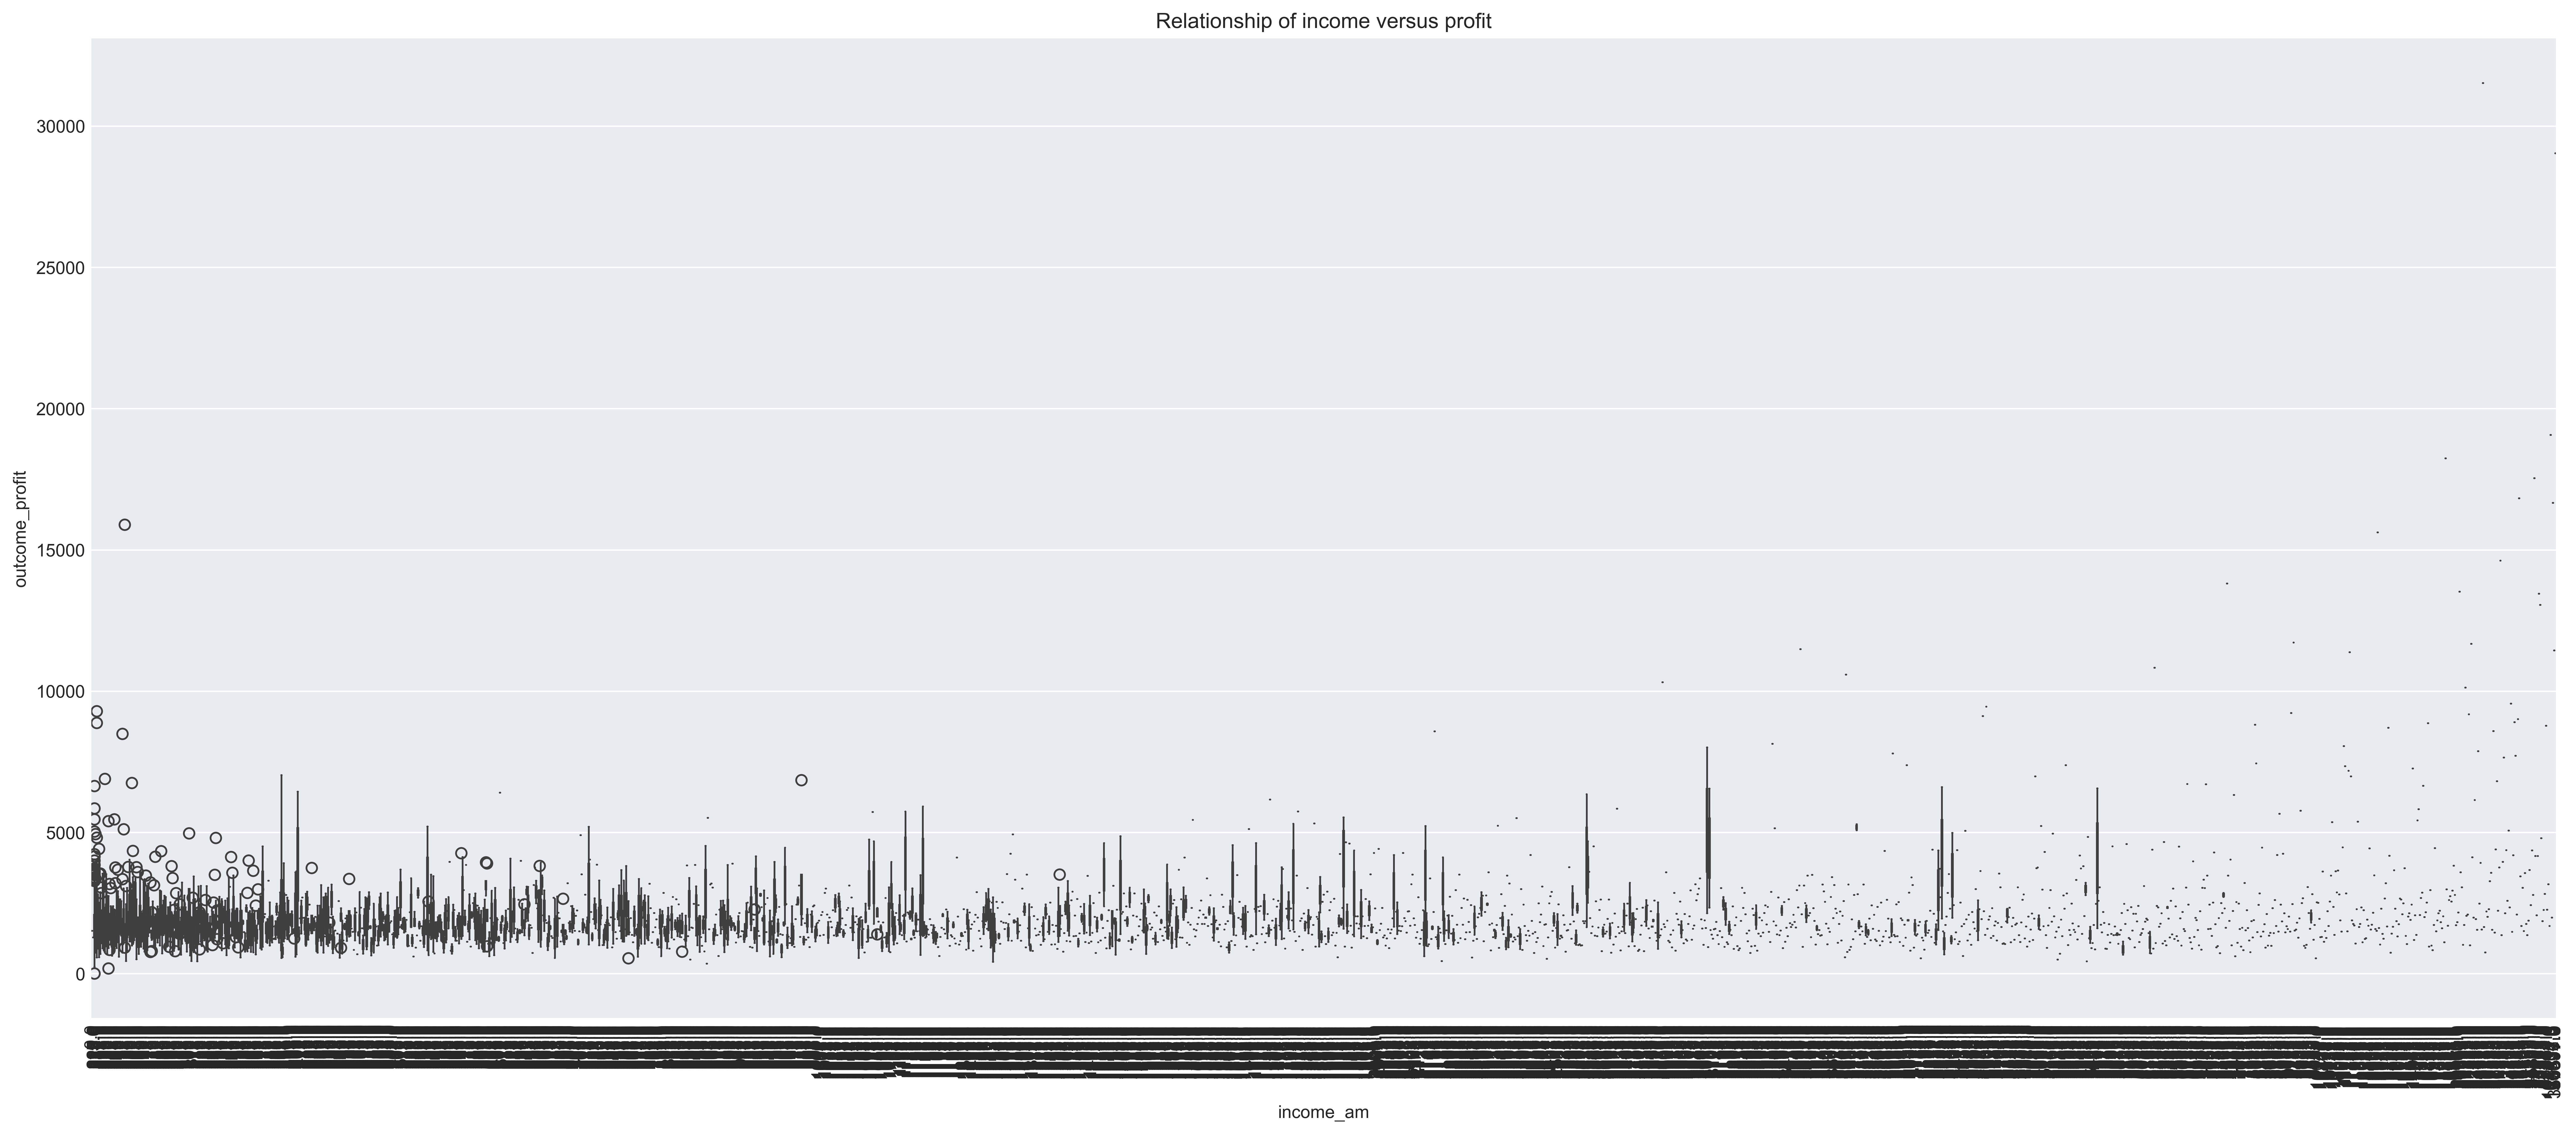

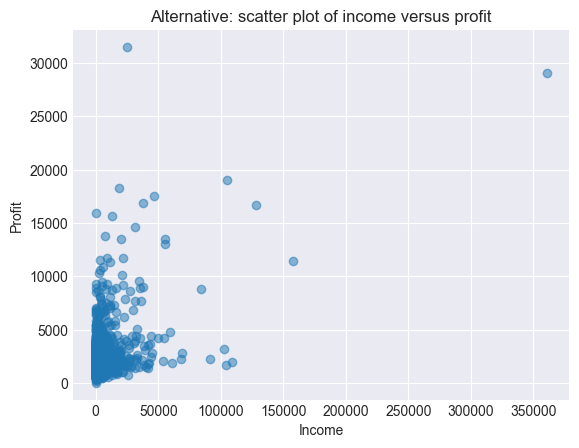

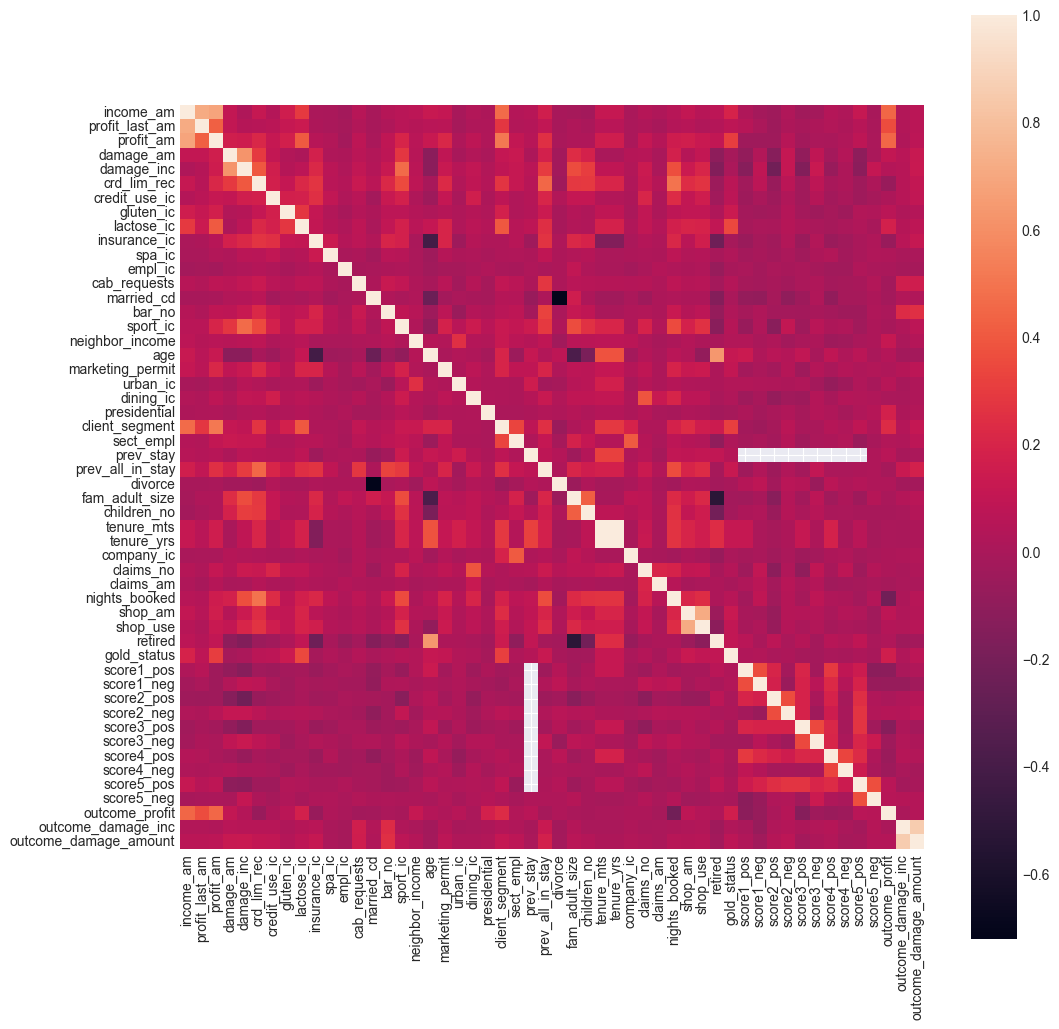

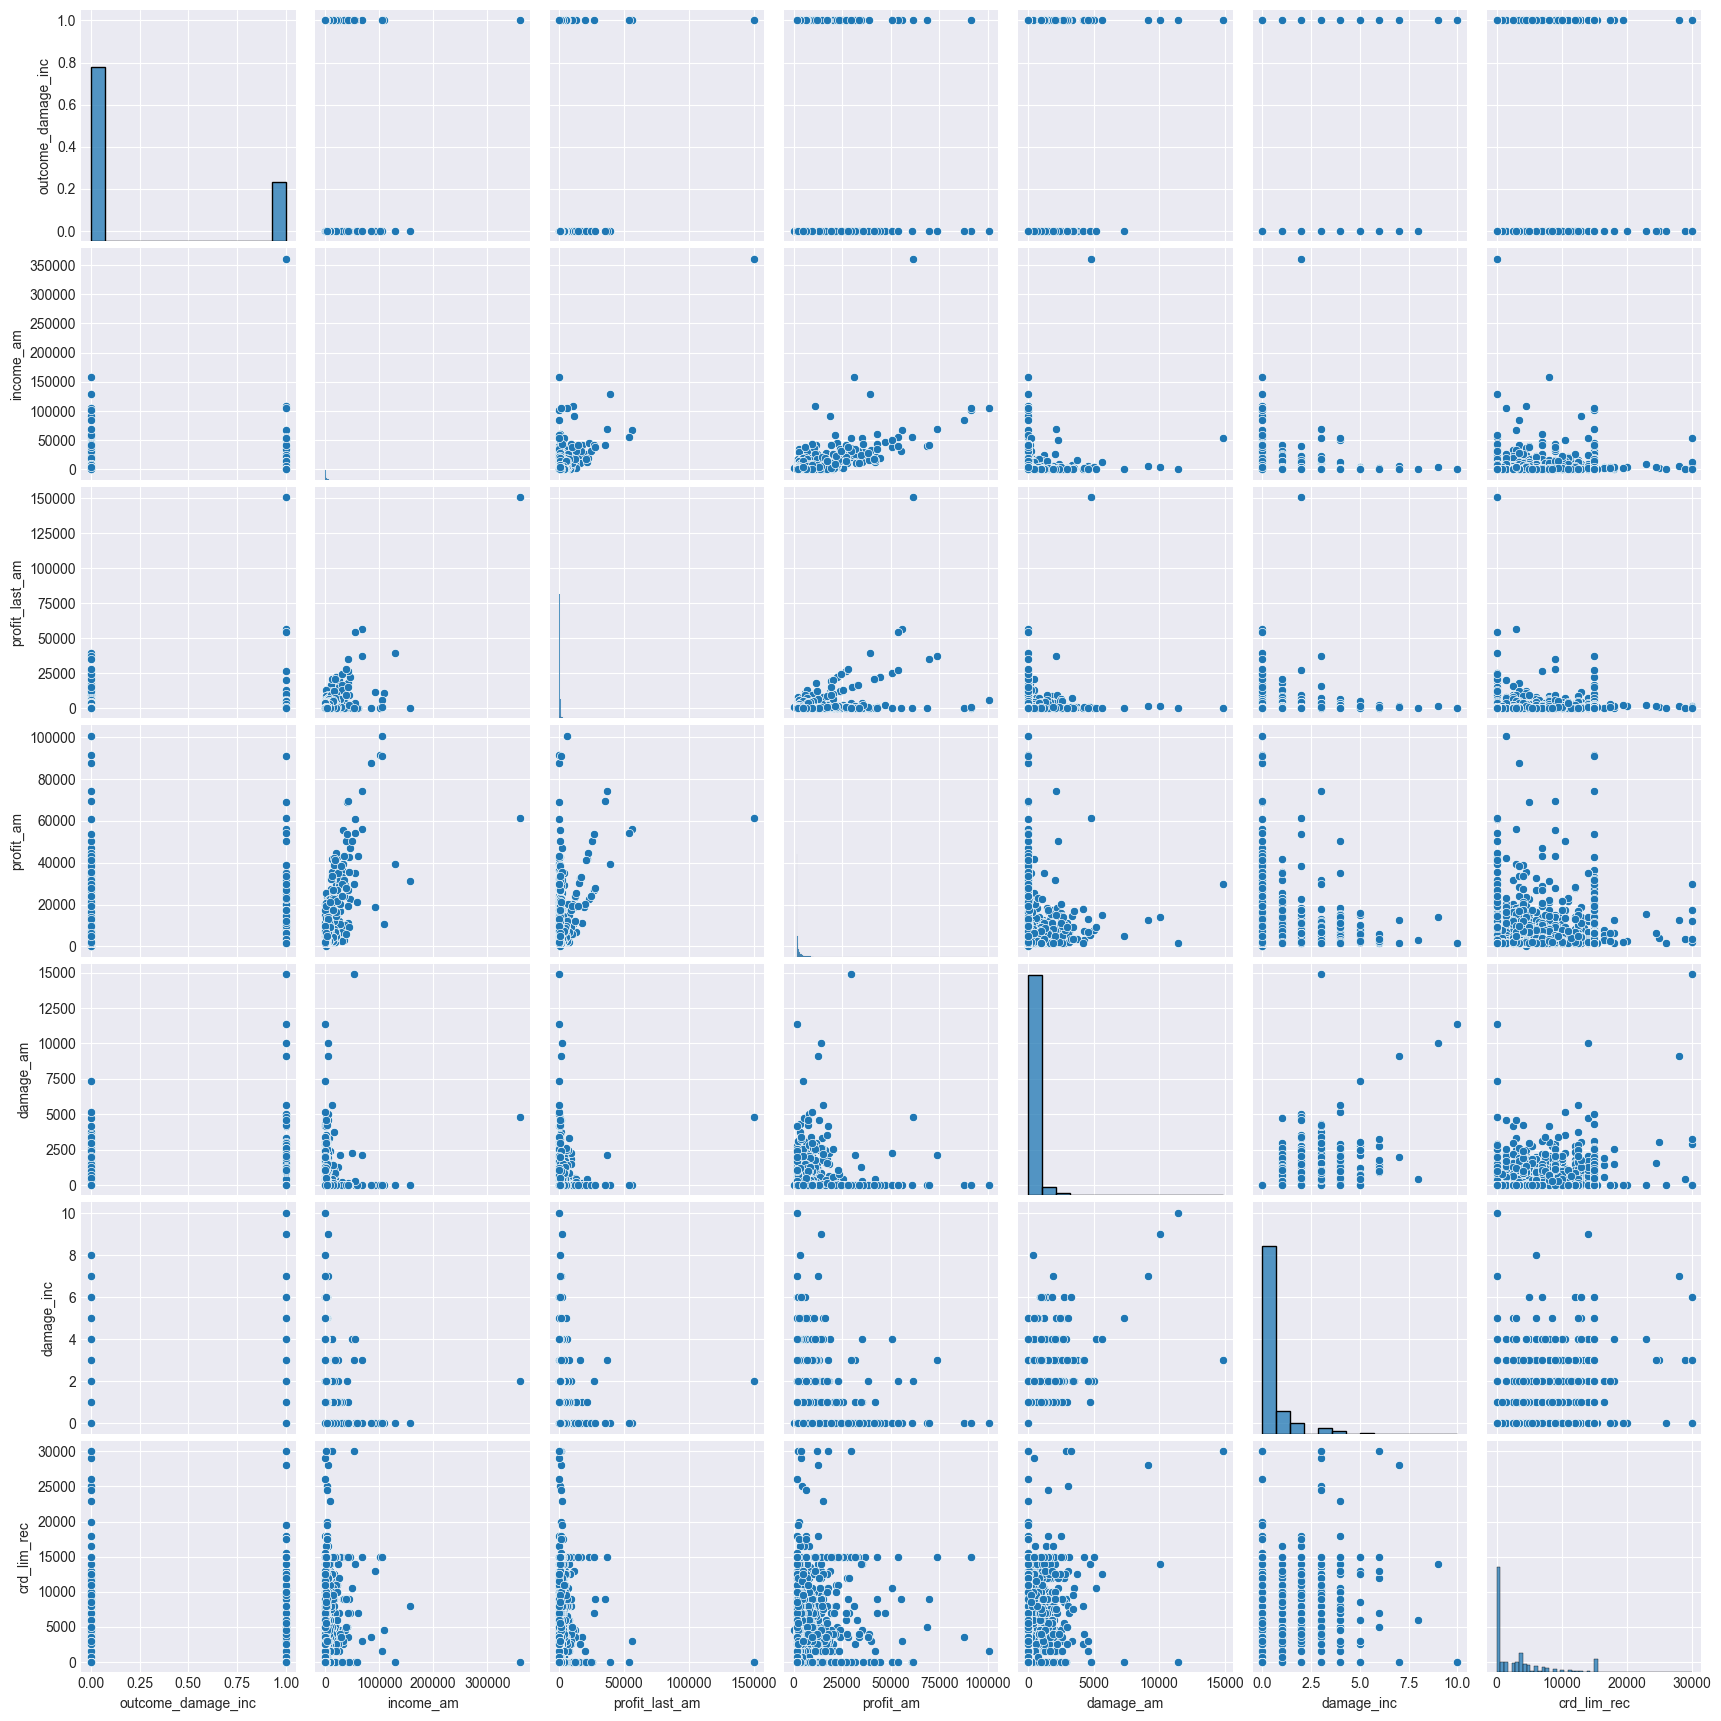

In [9]:
# Boxplot-type for year built vs SalePrice
plt.figure(figsize=(25, 10), dpi=500)  # Bumping up image size and DPI for better viewing
sns.boxplot(x='income_am', y='outcome_profit', data=train_V2);
#plt.ylim((0, 800000));  # Setting a maximum, you have some serious outliers, they make plot less nice!
plt.xticks(rotation=90);  # To rotate x-axis labels
plt.title('Relationship of income versus profit');
plt.show()  # remember: necessary to do this when trying to plot multiple plots from a single cell!

# But I guess a scatter plot would've done well also
plt.scatter(x=train_V2['income_am'], y=train_V2['outcome_profit'], alpha=0.5);  # alpha=0.5 makes it a bit see through
plt.xlabel('Income');
plt.ylabel('Profit');
plt.title('Alternative: scatter plot of income versus profit');
plt.show() 

# Correlation matrix between features
corrmat = train_V2.corr(numeric_only=True)  # Since Pandas 2.0 you need to supply this attribute
plt.figure(figsize=(12, 12));
sns.heatmap(corrmat, vmax=1, square=True);
# Note, we keep SalePrice in here as well, proceed with caution (no data snooping!)

# Scatterplot matrix (might take a while)
plot_cols = ['outcome_damage_inc', 'income_am', 'profit_last_am', 'profit_am', 'damage_am', 'damage_inc', 'crd_lim_rec']
sns.pairplot(train_V2[plot_cols], height=2.5);

In [10]:
# Getting an idea about total missing values
total_missings = train_V2.isnull().sum().sort_values(ascending=False)  # total missng values, sorted
total_missings.head(20)  # Show top 20 most missing features

# Getting an idea about percentage missing values
pct_missings = train_V2.isnull().mean().sort_values(ascending=False)  # average (%) missng values, sorted
pct_missings.head(20)  # Show top 20 most missing features

# Checking frequency table of a feature (xxx)
#train_V2['xxx'].value_counts()

score2_pos         0.7582
score4_pos         0.7554
score1_pos         0.7550
score5_pos         0.7536
score3_pos         0.7478
score2_neg         0.7392
score1_neg         0.7372
score4_neg         0.7352
score3_neg         0.7266
score5_neg         0.7014
tenure_yrs         0.0784
tenure_mts         0.0784
neighbor_income    0.0478
shop_use           0.0176
presidential       0.0176
cab_requests       0.0176
dining_ic          0.0176
company_ic         0.0106
claims_no          0.0106
income_am          0.0106
dtype: float64

In [11]:
print(f"Shape of train_V2 BEFORE dropping missing features: {train_V2.shape}")
missing_a_lot = pct_missings[pct_missings > 0.15].index  # we take from all variables those missing most, and take the row-idx
print(f"Columns missing more than 15% :{missing_a_lot}")
#train_V2 = train_V2.drop(missing_a_lot, axis=1)
#print(f"Shape of train_V2 AFTER dropping missing features: {train_V2.shape}")

Shape of train_V2 BEFORE dropping missing features: (5000, 53)
Columns missing more than 15% :Index(['score2_pos', 'score4_pos', 'score1_pos', 'score5_pos', 'score3_pos',
       'score2_neg', 'score1_neg', 'score4_neg', 'score3_neg', 'score5_neg'],
      dtype='object')


In [ ]:
# Imputation (filling in missing values) using SimpleImputer
# For continuous features
missing_feats_continuous = ['GarageYrBlt', 'MasVnrArea']  # defining the missing feats that are continuous
# Step 1 - Import the preprocessor object
from sklearn.impute import SimpleImputer 

# Step 2 - Instantiate the class into object
impute_quant = SimpleImputer(strategy='mean').set_output(transform='pandas')  # 'mean' is a valid strategy for the coming continuous missing features

# Step 3 - 'Fit' (or fit_transform) the imputer
train_V2[missing_feats_continuous] = impute_quant.fit_transform(X=train_V2[missing_feats_continuous])

# For categorical features
# Imputation of categorical features
missing_feats_categorical = ['GarageType', 'GarageFinish','GarageCond', 'GarageQual','BsmtFinType2', 
                             'BsmtExposure','BsmtFinType1', 'BsmtCond','BsmtQual', 'Electrical']  # of the ones with missing data, these are categorical

# Step 2 - Import the preprocessor object (step 1 already done above)
impute_cat = SimpleImputer(strategy='most_frequent')

# Step 3 - 'Fit' (or fit_transform) the imputer
train_V2[missing_feats_categorical] = impute_cat.fit_transform(X=train_V2[missing_feats_categorical])
# Total amount of missings
total_total_missings = train_V2.isnull().sum().sum()
print(f'Are there any missings at all anymore, if this is zero, there are none: {total_total_missings}')
# YAY!